# 📝 Project Overview

## 🎯 Task Description

The goal of this project is to **predict students' final exam scores** based on various academic, behavioral, social, and demographic factors. This is a **supervised regression task** where the target variable is **`Exam_Score`** (a continuous numerical value).

---

## 📊 Dataset Overview

This dataset contains information on various factors influencing student performance. The target variable is **`Exam_Score`**.

| **Feature**                   | **Description**                                                                 |
|------------------------------|---------------------------------------------------------------------------------|
| `Hours_Studied`              | Number of hours spent studying per week.                                       |
| `Attendance`                 | Percentage of classes attended.                                                |
| `Parental_Involvement`       | Level of parental involvement in the student's education (`Low`, `Medium`, `High`). |
| `Access_to_Resources`        | Availability of educational resources (`Low`, `Medium`, `High`).              |
| `Extracurricular_Activities` | Participation in extracurricular activities (`Yes`, `No`).                    |
| `Sleep_Hours`                | Average number of hours of sleep per night.                                    |
| `Previous_Scores`            | Scores from previous exams.                                                    |
| `Motivation_Level`           | Student's level of motivation (`Low`, `Medium`, `High`).                       |
| `Internet_Access`            | Availability of internet access (`Yes`, `No`).                                 |
| `Tutoring_Sessions`          | Number of tutoring sessions attended per month.                                |
| `Family_Income`              | Family income level (`Low`, `Medium`, `High`).                                 |
| `Teacher_Quality`            | Quality of the teachers (`Low`, `Medium`, `High`).                             |
| `School_Type`                | Type of school attended (`Public`, `Private`).                                 |
| `Peer_Influence`             | Influence of peers on academic performance (`Positive`, `Neutral`, `Negative`).|
| `Physical_Activity`          | Average number of hours of physical activity per week.                         |
| `Learning_Disabilities`      | Presence of learning disabilities (`Yes`, `No`).                               |
| `Parental_Education_Level`   | Highest education level of parents (`High School`, `College`, `Postgraduate`). |
| `Distance_from_Home`         | Distance from home to school (`Near`, `Moderate`, `Far`).                      |
| `Gender`                     | Gender of the student (`Male`, `Female`).                                      |
| `Exam_Score`                 | **Final exam score (Target variable).**                                        |

---

## 🔍 Steps Performed

1. **Data Cleaning & Preprocessing**
   - Handled missing values.
   - Converted categorical features using encoding techniques (One-Hot Encoding,ordinal encoding).
   - Normalized or scaled numerical features to standardize the dataset.

2. **Exploratory Data Analysis (EDA)**
   - Visualized feature distributions and correlations.
   - Identified potential outliers or unusual trends.
   - Examined the relationship between features and the target variable.

3. **Model Building**
   - Split the dataset into training and testing sets.
   - Applied various regression models (Linear Regression,PolynomialRegression).

4. **Model Evaluation**
   - Evaluated model performance using metrics such as MAE, MSE, RMSE, and R² score.
   - Interpreted model performance through evaluation metrics and cross-validation results.

---

> ✅ The insights gained from this project can help educators and policymakers better understand the key drivers of academic performance and implement strategies to improve student outcomes.

# 1. Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.io as pio
import kagglehub

from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , make_scorer

import warnings
warnings.filterwarnings('ignore')

import plotly.io as pio
pio.renderers.default = 'iframe_connected'

In [2]:
file_path = f"{kagglehub.dataset_download('lainguyn123/student-performance-factors')}/StudentPerformanceFactors.csv"

df = pd.read_csv(file_path)

# 2. Data Exploration

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
df.shape

(6607, 20)

In [8]:
cat_cols = df.select_dtypes(include='object')
num_cols = df.select_dtypes(include='number')
num_cols.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

In [9]:
cat_cols.columns

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [10]:
cat_summary = {}

for col in cat_cols.columns:
    unique_vals = df[col].dropna().unique()
    cat_summary[col] = [", ".join(map(str, unique_vals[:10])) + (" ..." if len(unique_vals) > 10 else "")]

summary_df = pd.DataFrame(cat_summary).T
summary_df.columns = ["Unique Values"]
summary_df["Count"] = summary_df["Unique Values"].apply(lambda x: len(x.split(", ")))

styled = summary_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#B99470'), ('color', 'white'), ('font-weight', 'bold')]}]
).background_gradient(cmap="YlGnBu", subset=["Count"]).set_properties(**{
    'text-align': 'left',
    'border': '1px solid gray',
}).set_caption("💠 Summary of Categorical Columns")

styled

,Unique Values,Count
Parental_Involvement,"Low, Medium, High",3
Access_to_Resources,"High, Medium, Low",3
Extracurricular_Activities,"No, Yes",2
Motivation_Level,"Low, Medium, High",3
Internet_Access,"Yes, No",2
Family_Income,"Low, Medium, High",3
Teacher_Quality,"Medium, High, Low",3
School_Type,"Public, Private",2
Peer_Influence,"Positive, Negative, Neutral",3
Learning_Disabilities,"No, Yes",2


In [11]:
cat_cols = df.select_dtypes(include='O')

cols = 2
rows = (len(cat_cols.columns) + 1) // cols

fig = sp.make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=[col for col in cat_cols.columns])

for i, column in enumerate(cat_cols.columns):
    row = (i // cols) + 1
    col = (i % cols) + 1
    count_df = df[column].fillna('Unknown').value_counts().reset_index()
    count_df.columns = [column, 'count']

    fig.add_trace(
        go.Bar(
            x=count_df[column],
            y=count_df['count'],
            text=count_df['count'],
            textposition='auto',
            showlegend=False 
        ),
        row=row,
        col=col
    )

fig.update_layout(
    title_text="Distribution of Each Categorical Feature",
    height=2500,
    width=900,
    showlegend=False,       
    template='plotly_white'
)

fig.show()

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
train_missing = pd.DataFrame({
    'total_missing': df.isnull().sum(), 
    'perc_missing': (df.isnull().sum() / df.shape[0]) * 100
})
train_missing = train_missing[train_missing["total_missing"] > 0]
train_missing = train_missing.sort_values(by="perc_missing", ascending=False)

train_missing.style.background_gradient(cmap='Oranges')\
               .format({'perc_missing': '{:.2f}%'})\
               .set_caption("🩹 Missing Values Summary")

,total_missing,perc_missing
Parental_Education_Level,90,1.36%
Teacher_Quality,78,1.18%
Distance_from_Home,67,1.01%


In [14]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Hours_Studied: 43 outliers
Attendance: 0 outliers
Sleep_Hours: 0 outliers
Previous_Scores: 0 outliers
Tutoring_Sessions: 430 outliers
Physical_Activity: 0 outliers
Exam_Score: 104 outliers


# 3. Data Preprocessing and cleaning

## 3.1 Handling null valuse-- with `SimpleImputer` 

In [15]:
columns_to_impute = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

imputer = SimpleImputer(strategy='most_frequent')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [16]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

## 3.2 Handling Outliers – with IQR Method and Median Imputation

In [17]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()
    df[col] = np.where((df[col] < lower) | (df[col] > upper), median, df[col])

In [18]:
for col in num_cols:
    fig = px.box(df, x=col, title=f"Boxplot of {col}", 
                 color_discrete_sequence=["skyblue"])
    fig.update_layout(
        title_font=dict(size=16, family='Arial', color='black'),
        xaxis_title='',  # hide x-axis title
        template='plotly_white',
        showlegend=False
    )
    fig.show()

## 3.3 Visualizing Numerical Distributions – Histogram

In [19]:
for col in num_cols:
    fig = px.histogram(df, x=col, nbins=50, opacity=0.7,
                       histnorm='density', title=f"Histogram Plot of {col}",
                       color_discrete_sequence=["skyblue"])

    fig.update_traces(marker_line_width=0) 
    fig.update_layout(
        title_font=dict(size=16, family='Arial', color='black'),
        xaxis_title=col,
        yaxis_title="Density",
        template='plotly_white',
        showlegend=False
    )
    fig.show()

## 3.4 Correlation Heatmap – Numerical Features

In [20]:
corr_matrix = df[num_cols.columns].corr()

corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']

fig = px.imshow(
    corr_matrix,
    text_auto=".2f",
    color_continuous_scale='RdBu_r',
    title="Correlation Heatmap of Numerical Features",
    labels=dict(color="Correlation"),
)

fig.update_layout(
    width=800,
    height=700,
    template="plotly_white",
    title_font=dict(size=18),
)

fig.show()

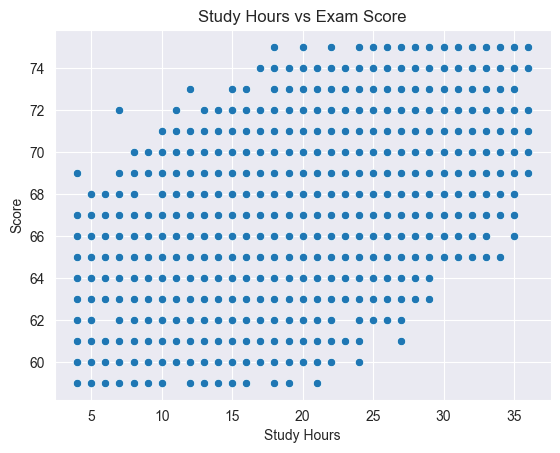

In [21]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.grid(True)
plt.show()

## 3.5 Relationship Between Hours Studied, Attendance, and Exam Score

In [22]:
fig = px.scatter(df, 
                 x="Hours_Studied", 
                 y="Exam_Score", 
                 color="Attendance",
                 color_continuous_scale="Viridis", 
                 title="Study Hours and Attendance on Exam")

fig.update_layout(width=600, height=500,template='plotly_white',title_x=0.5)
fig.show()

atg = df.groupby("Attendance")["Exam_Score"].mean()

## 3.6 Encoding Categorical Features

To prepare the dataset for machine learning models, categorical features must be encoded numerically.

- **Nominal features** such as gender, school type, and internet access were one-hot encoded using `pd.get_dummies`, excluding the first category to avoid the dummy variable trap.
- **Ordinal features** such as parental involvement and access to resources were encoded with **manual mappings** that preserve the order (Low < Medium < High).

In [23]:
df_encoded = df.copy()

In [24]:
# ordinal encoding
ordinal_encoding = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Distance_from_Home': ['Near', 'Moderate', 'Far'],
    'Peer_Influence': ['Negative', 'Neutral', 'Positive']
}

# Apply ordinal encoding
for feature, levels in ordinal_encoding.items():
    df_encoded[feature] = df_encoded[feature].apply(lambda x: levels.index(x))

In [25]:
#one-hot encode (nominal)
categorical_features = [
    'Extracurricular_Activities',
    'Internet_Access',
    'Learning_Disabilities',
    'School_Type',
    'Gender'
]

# One-hot encode nominal features (excluding first category to avoid dummy variable trap)
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features, drop_first=True)

In [26]:
df_encoded.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,School_Type_Public,Gender_Male
0,23.0,84.0,0,2,7.0,73.0,0,0.0,0,1,2,3.0,0,0,67.0,False,True,False,True,True
1,19.0,64.0,0,1,8.0,59.0,0,2.0,1,1,0,4.0,1,1,61.0,False,True,False,True,False
2,24.0,98.0,1,1,7.0,91.0,1,2.0,1,1,1,4.0,2,0,74.0,True,True,False,True,True
3,29.0,89.0,0,1,8.0,98.0,1,1.0,1,1,0,4.0,0,1,71.0,True,True,False,True,True
4,19.0,92.0,1,1,6.0,65.0,1,3.0,1,2,1,4.0,1,0,70.0,True,True,False,True,False


## 3.7 Feature Scaling

We applied `StandardScaler` to normalize all numerical features before modeling. This step ensures that features contribute equally to distance-based models (like KNN) and gradient-based methods (like linear regression).

In [27]:
X = df_encoded.drop(columns=['Exam_Score'])
y = df_encoded['Exam_Score']

In [28]:
# scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Data Modeling

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 4.1 Linear Regression model

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

In [31]:
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
fig = px.scatter(df_plot, x='Actual', y='Predicted',
                 title='Actual vs Predicted Exam Scores',
                 labels={'Actual': 'Actual Exam Score', 'Predicted': 'Predicted Exam Score'})

fig.add_shape(
    type='line',
    x0=df_plot['Actual'].min(), y0=df_plot['Actual'].min(),
    x1=df_plot['Actual'].max(), y1=df_plot['Actual'].max(),
    line=dict(color='red', dash='dash'),
)

fig.show()

In [32]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.5155281475914075
MSE: 0.9655611344536448
RMSE: 0.982629703628811
R² Score: 0.90852468369618


In [33]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

cv_folds = 5
mse_scores = -cross_val_score(lr_model, X, y, cv=cv_folds, scoring=mse_scorer)
mae_scores = -cross_val_score(lr_model, X, y, cv=cv_folds, scoring=mae_scorer)
r2_scores = cross_val_score(lr_model, X, y, cv=cv_folds, scoring=r2_scorer)

cv_df = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(cv_folds)],
    'MSE': mse_scores,
    'MAE': mae_scores,
    'R²': r2_scores
})

mean_row = pd.DataFrame({
    'Fold': ['Average'],
    'MSE': [mse_scores.mean()],
    'MAE': [mae_scores.mean()],
    'R²': [r2_scores.mean()]
})
cv_df = pd.concat([cv_df, mean_row], ignore_index=True)

cv_df.style.background_gradient(subset=['MSE', 'MAE'], cmap='YlOrRd', axis=0) \
             .background_gradient(subset=['R²'], cmap='Greens', axis=0) \
             .format({'MSE': '{:.3f}', 'MAE': '{:.3f}', 'R²': '{:.3f}'}) \
             .set_caption("Cross-Validation Metrics per Fold")

,Fold,MSE,MAE,R²
0,Fold 1,0.809,0.490,0.917
1,Fold 2,1.088,0.538,0.895
2,Fold 3,1.080,0.509,0.897
3,Fold 4,1.053,0.516,0.898
4,Fold 5,1.010,0.501,0.907
5,Average,1.008,0.511,0.903


## 4.2 Polynomial Regression (degree = 2)

In [34]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

In [35]:
print("Polynomial R² Score:", r2_score(y_test, y_pred_poly))

Polynomial R² Score: 0.9059233857458365


In [36]:
df_poly_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_poly
})

fig = px.scatter(df_poly_plot, x='Actual', y='Predicted',
                 title='Actual vs Predicted Exam Scores (Polynomial Regression)',
                 labels={'Actual': 'Actual Exam Score', 'Predicted': 'Predicted Exam Score'})

fig.add_shape(
    type='line',
    x0=df_poly_plot['Actual'].min(), y0=df_poly_plot['Actual'].min(),
    x1=df_poly_plot['Actual'].max(), y1=df_poly_plot['Actual'].max(),
    line=dict(color='red', dash='dash'),
)

fig.show()

# ✅ Final Conclusion

After evaluating multiple regression models, the **Linear Regression model** was selected as the best performing model based on accuracy, simplicity, and stability across folds.

---

### 📊 Linear Regression Final Results:
- **R² Score**: 0.909
- **MAE**: 0.516
- **MSE**: 0.966
- **RMSE**: 0.983

---

### 🔁 Cross-Validation Results (5-Fold):
- **Average MAE**: 0.510
- **Average MSE**: 1.008
- **Average R²**: 0.903

---

### 🎯 Why Linear Regression?
- Polynomial regression offered no significant improvement.
- Linear regression is simpler and performs just as well.
- Errors are consistently low and acceptable.
- ---